
Missing values in each column:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Data types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     fl

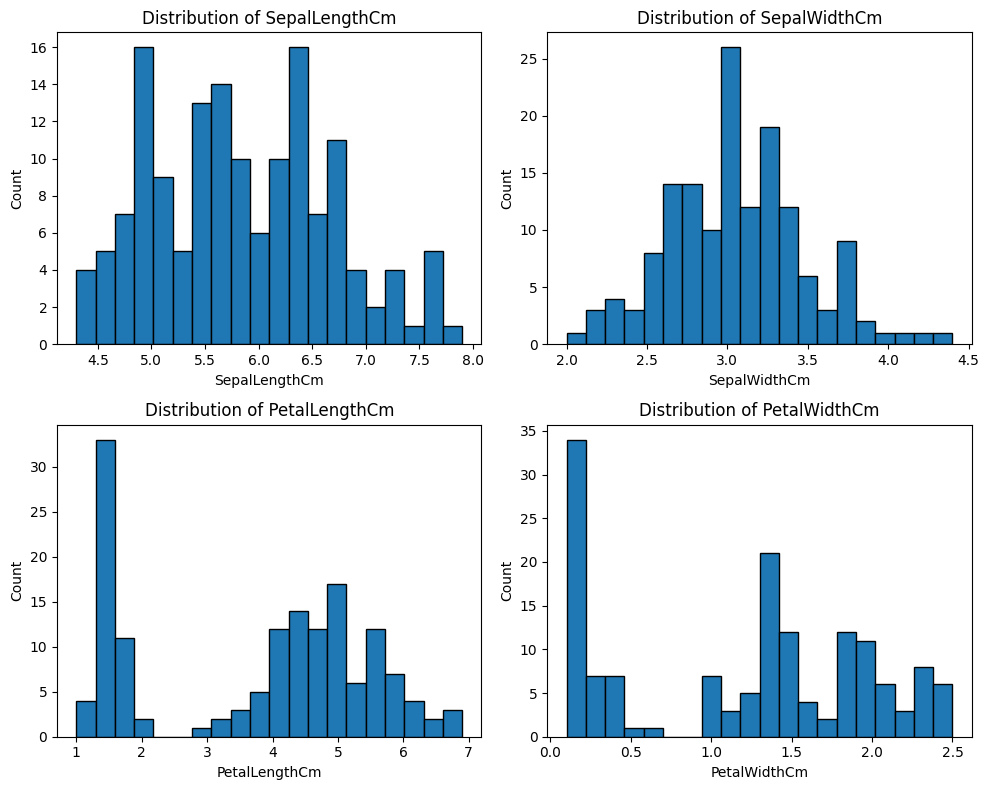

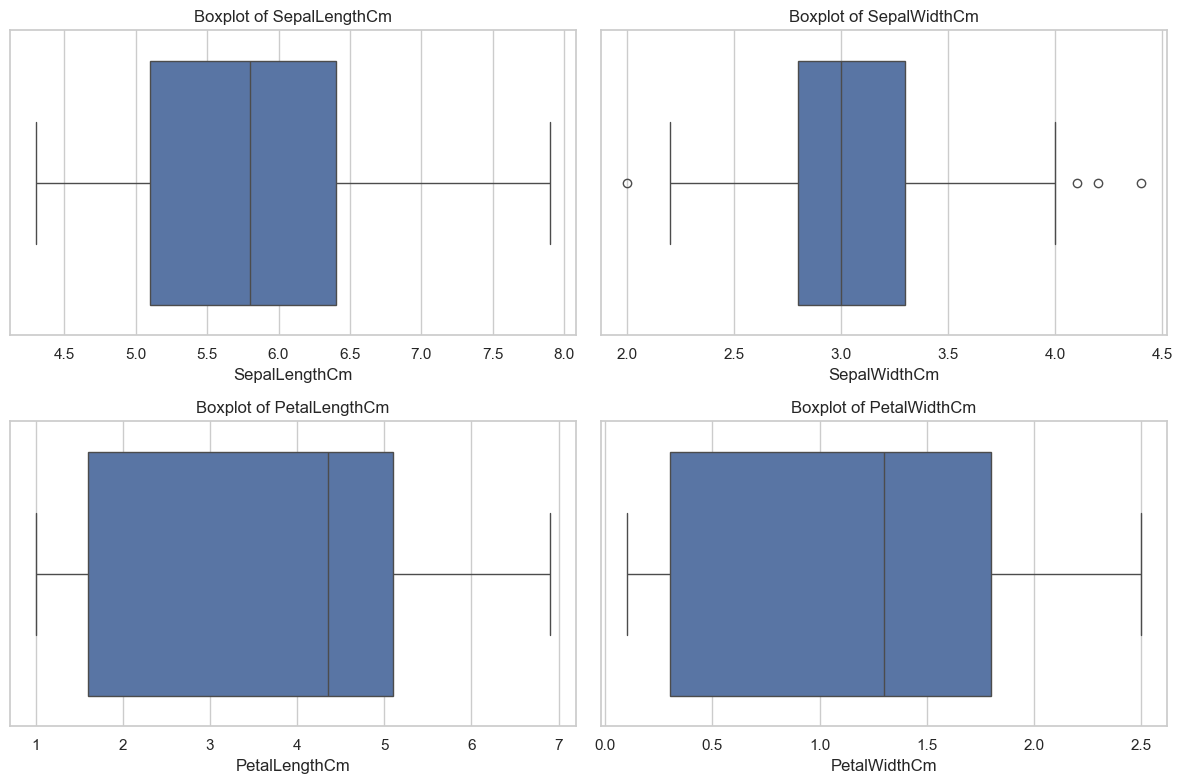

(array([15, 32, 33]),)
(array([60]),)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
60            5.0           2.0            3.5           1.0  Iris-versicolor

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Downloads/Iris.csv")
df.head()

# -----------------------------------------
# Data Preprocessing (ADDED SECTION)
# -----------------------------------------

# 1. Check for null values
print("\nMissing values in each column:\n", df.isnull().sum())

# 2. Basic statistical summary
print("\nStatistical summary:\n", df.describe())

# 3. Check data types
print("\nData types:\n", df.dtypes)

# 4. Detect outliers using IQR (only for numeric columns)
numeric_df = df.select_dtypes(include='number')

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print("\nOutliers detected:\n", outliers.sum())

# 5. Optional: Normalize features (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:5]] = scaler.fit_transform(df[df.columns[1:5]])
# You can now use df_scaled for ML or plotting if needed

# -----------------------------------------
# Your Original Code Starts Here
# -----------------------------------------

df.dtypes

#### 1. List down the features and their types
# - Sepal Length : Numeric, Nominal
# - Sepal Width  : Numeric, Nominal
# - Petal Length : Numeric, Nominal
# - Petal Width  : Numeric, Nominal

df.drop("Id", axis=1, inplace=True)

#### 2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = df.columns[:-1]

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, bins=20, alpha=1.0)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

#### 3. Create a boxplot for each feature in the dataset.
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature], data=df)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

#### 4. Compare distributions and identify outliers.
import numpy as np

print(np.where(df["SepalWidthCm"] > 4.0))
print(np.where(df["SepalWidthCm"] <= 2.0))
df[df["SepalWidthCm"] > 4.0] 
df[df["SepalWidthCm"] <= 2.0]


In [3]:
df[df["SepalWidthCm"] <= 2.0] 

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
60            5.0           2.0            3.5           1.0  Iris-versicolor

In [4]:
df[df["SepalWidthCm"] > 4.0] 

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
15            5.7           4.4            1.5           0.4  Iris-setosa
32            5.2           4.1            1.5           0.1  Iris-setosa
33            5.5           4.2            1.4           0.2  Iris-setosa